# Proyek Analisis Data: Nama dataset
- Nama: Syahrul Ghani Abdul Rasyad
- Email: abdul15rasyad@gmail.com
- Id Dicoding: Syahrul Ghani Abdul Rasyad

## Menentukan Pertanyaan Bisnis

- Bagaimana trend bulanan peminjaman sepeda?
- Bagaimana perbandingan jumlah peminjaman pelanggan casual dan registered?

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Wrangling

### Gathering Data

In [2]:
! pip install -q kaggle

In [3]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download lakshmi25npathi/bike-sharing-dataset

bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import zipfile
with zipfile.ZipFile("/content/bike-sharing-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

In [8]:
data=pd.read_csv("day.csv")
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

CEK DATA TIAP FEATURE

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari hasil cek tipe data, didapatkan :


1.   Ubah format dteday kedalam datetime
2.   Tidak diindikasikan terdapat missing value



CEK DUPLIKASI DATA

In [10]:
#cek duplikasi data
duplikasi = data.duplicated().sum()
print("jumlah data duplikasi yang ada : ", duplikasi)

jumlah data duplikasi yang ada :  0


CEK NILAI DATA YANG TIDAK RELEVANT

In [11]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


ubah nilai data dari yr, mnth, dan season menjadi seharusnya (tidak diwakili angka) agar lebih jelas saat divisulisasikan

### Cleaning Data

#### MENGUBAH TIPE DATA

In [12]:
#Mengubah tipe data dteday menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  data[column] = pd.to_datetime(data[column])

In [13]:
#Mengekstrak bulan-tahun dari dteday
bulan_tahun=data["dteday"].dt.strftime("%m-%Y")
data["bulan_tahun"]=bulan_tahun

In [14]:
#Mengubah tipe data bulan_tahun menjadi datetime
datetime_columns = ["bulan_tahun"]

for column in datetime_columns:
  data[column] = pd.to_datetime(data[column])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   dteday       731 non-null    datetime64[ns]
 2   season       731 non-null    int64         
 3   yr           731 non-null    int64         
 4   mnth         731 non-null    int64         
 5   holiday      731 non-null    int64         
 6   weekday      731 non-null    int64         
 7   workingday   731 non-null    int64         
 8   weathersit   731 non-null    int64         
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  hum          731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  cnt          731 non-null    int64         
 16  bulan_ta

## Exploratory Data Analysis (EDA)

### Explore Data Peminjaman Perbulan

In [16]:
#Group data berdasarkan bulan dan tahun
data_bulanan=data.groupby(by=["bulan_tahun"]).agg({
    "casual" :  "sum",
    "registered" : "sum",
    "cnt" : "sum"
})

print(data_bulanan)

             casual  registered     cnt
bulan_tahun                            
2011-01-01     3073       35116   38189
2011-02-01     6242       41973   48215
2011-03-01    12826       51219   64045
2011-04-01    22346       72524   94870
2011-05-01    31050      104771  135821
2011-06-01    30612      112900  143512
2011-07-01    36452      104889  141341
2011-08-01    28842      107849  136691
2011-09-01    26545      100873  127418
2011-10-01    25222       98289  123511
2011-11-01    15594       86573  102167
2011-12-01     8448       78875   87323
2012-01-01     8969       87775   96744
2012-02-01     8721       94416  103137
2012-03-01    31618      133257  164875
2012-04-01    38456      135768  174224
2012-05-01    44235      151630  195865
2012-06-01    43294      159536  202830
2012-07-01    41705      161902  203607
2012-08-01    43197      171306  214503
2012-09-01    43778      174795  218573
2012-10-01    34538      164303  198841
2012-11-01    21009      131655  152664


In [20]:
data_pelanggan=data.groupby(by="yr"). agg({
    "casual" : "sum",
    "registered" : "sum",
})

## Visualization & Explanatory Analysis

### Pertanyaan 1:

*   Bagaimana trend bulanan peminjaman sepeda?



<function matplotlib.pyplot.show(close=None, block=None)>

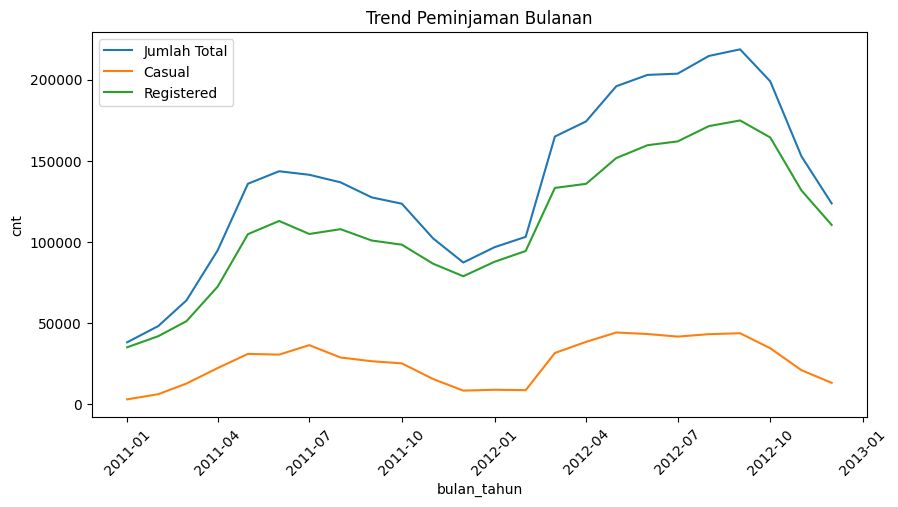

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=data_bulanan,
    x="bulan_tahun",
    y="cnt",
    label="Jumlah Total"
)
sns.lineplot(
    data=data_bulanan,
    x="bulan_tahun",
    y="casual",
    label="Casual"
)
sns.lineplot(
    data=data_bulanan,
    x="bulan_tahun",
    y="registered",
    label="Registered"
)
plt.title("Trend Peminjaman Bulanan")
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.legend()
plt.show

### Pertanyaan 2:

*   Bagaimana perbandingan jumlah peminjaman pelanggan casual dan registered?





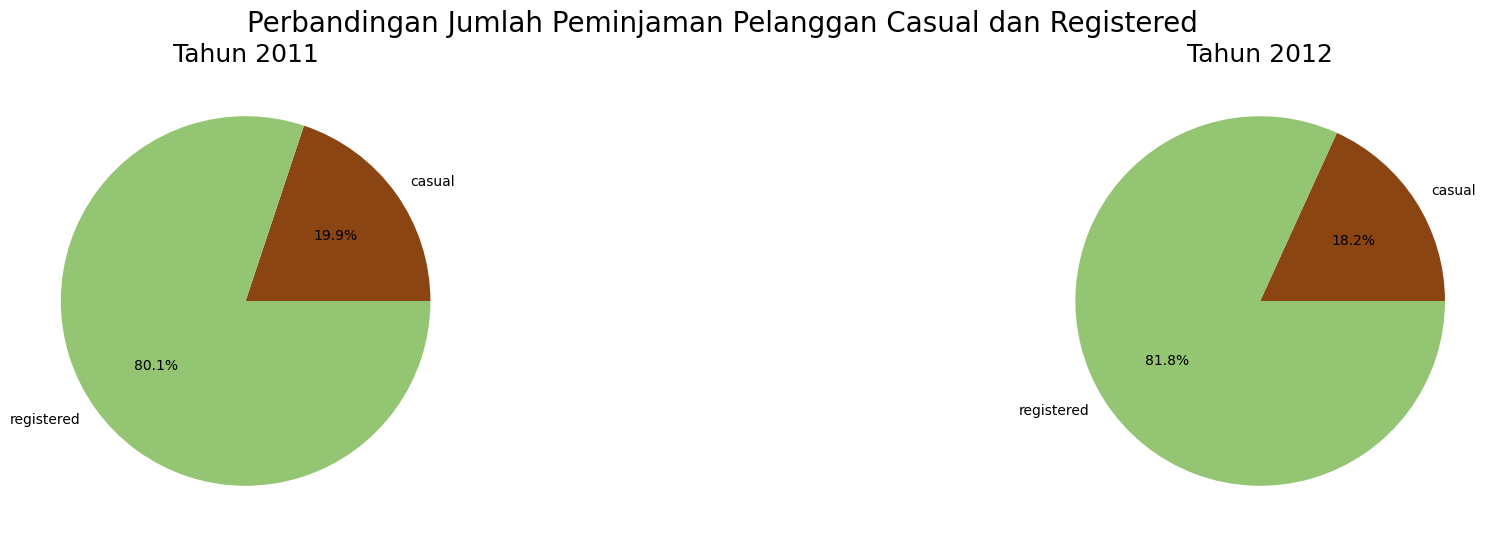

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

ax[0].pie(
    x= data_pelanggan.iloc[0],
    labels=["casual","registered"],
    autopct='%1.1f%%',
    colors=('#8B4513', '#93C572'),

)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Tahun 2011", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

ax[1].pie(
    x= data_pelanggan.iloc[1],
    labels=["casual","registered"],
    autopct='%1.1f%%',
    colors=('#8B4513', '#93C572'),
    #ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].yaxis.set_label_position("right")
ax[1].set_title("Tahun 2012", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Perbandingan Jumlah Peminjaman Pelanggan Casual dan Registered", fontsize=20)
plt.show()

## Conclusion

- Conclution "Bagaimana trend bulanan peminjaman sepeda"


1.   Untuk tahun 2011, Peminjaman sepeda akan meningkat dan mencapai puncaknya ketika dipertengahan tahun antara bulan mei dan juni, lalu akan kembali menurun sampai dengan akhir tahun

2.   Untuk tahun 2012, sama seperti tahun 2011 hanya saja puncak peminjaman berada pada antara bulan agustus dan september

2.   Total peminjaman pada tahun 2012 cenderung lebih banyak dari tahun 2011

3.   Total pemnijaman untuk pelanggan resgistered lebih banyak daripada pelanggan casual


- conclution "Bagaimana perbandingan jumlah peminjaman pelanggan casual dan registered?"


1.   Baik untuk tahun 2011 maupun 2012, Jumlah peminjaman pelanggan rregistered lebih banyak dari pada casual dengan proporsi peminjaman yang sangat jauh.





In [24]:
data.to_csv("data.csv", index=False)